In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
knn = DecisionTreeClassifier(max_depth=3)
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\utente\Untitled Folder 1\Dataset.csv")

In [3]:
# Check for missing values
print(data.isnull().sum())

Species              0
Ratio                0
Angle_of_Base\t      0
Angle_of_Apex        0
Length_of_Petiole    0
dtype: int64


In [4]:
# Normalize features
scaler = StandardScaler()
features = data[["Ratio", "Angle_of_Base\t", "Angle_of_Apex", "Length_of_Petiole"]]
features_scaled = scaler.fit_transform(features)

In [5]:
# Encode labels to integers
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data["Species"])

In [6]:
# Determine the number of unique classes
num_classes = len(set(labels))
print("Number of unique classes:", num_classes)

Number of unique classes: 3


In [7]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

In [8]:
# Define hyperparameters
learning_rate = 0.001  # Learning rate for the optimizer
epochs = 50  # Number of training epochs
batch_size = 10  # Batch size for training
l1_reg_lambda = 0.01  # L1 regularization strength
l2_reg_lambda = 0.01  # L2 regularization strength
dropout_rate = 0.2  # Dropout rate for hidden layers

In [9]:
# Build the neural network
model = Sequential([
    Dense(64, activation="relu", input_shape=(4,), kernel_regularizer=l1_l2(l1=l1_reg_lambda, l2=l2_reg_lambda)),  # Input layer with L1 and L2 regularization
    Dropout(dropout_rate),  # Dropout layer
    Dense(32, activation="relu", kernel_regularizer=l1_l2(l1=l1_reg_lambda, l2=l2_reg_lambda)),  # Hidden layer with L1 and L2 regularization
    Dropout(dropout_rate),  # Dropout layer
    Dense(num_classes, activation="softmax")  # Output layer with dynamic number of classes
])

In [10]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              metrics=["accuracy"])

In [11]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/50
6/6 [==============================] - 1s 97ms/step - loss: 4.5097 - accuracy: 0.4667 - val_loss: 4.4264 - val_accuracy: 0.4667
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 4.3062 - accuracy: 0.5500 - val_loss: 4.2541 - val_accuracy: 0.5333
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 4.1455 - accuracy: 0.5833 - val_loss: 4.0917 - val_accuracy: 0.6000
Epoch 4/50
6/6 [==============================] - 0s 7ms/step - loss: 4.0112 - accuracy: 0.6333 - val_loss: 3.9321 - val_accuracy: 0.6667
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 3.8374 - accuracy: 0.6833 - val_loss: 3.7775 - val_accuracy: 0.8000
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 3.7110 - accuracy: 0.7167 - val_loss: 3.6291 - val_accuracy: 0.8000
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 3.5398 - accuracy: 0.8000 - val_loss: 3.4824 - val_accuracy: 0.8000
Epoch 8/50
6/6 [=================

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

1/1 [==============================] - 0s 22ms/step - loss: 0.8557 - accuracy: 0.9333
Test Accuracy: 0.9333333373069763


In [13]:
# Extract training and validation accuracy from the history object
training_acc = history.history['accuracy'][-1]
validation_acc = history.history['val_accuracy']
print("validation Accuracy:", validation_acc)

validation Accuracy: [0.46666666865348816, 0.5333333611488342, 0.6000000238418579, 0.6666666865348816, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.8666666746139526, 0.8666666746139526, 0.8666666746139526, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0.9333333373069763, 0

In [14]:
training_acc = history.history['accuracy'][-1]
validation_acc = history.history['val_accuracy'][-1]
print("Final Training Accuracy:", training_acc)
print("Final Validation Accuracy:", validation_acc)

Final Training Accuracy: 0.8500000238418579
Final Validation Accuracy: 0.9333333373069763


In [15]:
# Make predictions on the test set
predictions = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [16]:
# Convert predicted probabilities to class labels
predicted_classes = predictions.argmax(axis=1)

In [22]:
# Print some sample predictions
print("Species Predictions:", predicted_classes[:5]) 

Species Predictions: [0 1 0 0 2]


In [25]:
X = data.drop("Species", axis=1)
X

,Ratio,Angle_of_Base\t,Angle_of_Apex,Length_of_Petiole
0,1.61,170,20,5.30
1,1.20,300,37,2.35
2,1.62,280,30,1.40
3,1.96,240,30,2.00
4,1.58,150,20,3.40
...,...,...,...,...
70,1.46,230,52,2.00
71,1.01,210,40,9.00
72,1.35,180,55,5.00
73,1.48,230,55,8.00


In [24]:
y = data["Species"]
y

0           Betel
1           Betel
2           Betel
3           Betel
4           Betel
         ...     
70    Long_Pepper
71    Long_Pepper
72    Long_Pepper
73    Long_Pepper
74    Long_Pepper
Name: Species, Length: 75, dtype: object

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
knn = DecisionTreeClassifier()
knn.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = knn.predict(X_test)

In [38]:
new_data = pd.DataFrame({"Ratio":[1.81],"Angle_of_Base\t":[197], "Angle_of_Apex":[22], "Length_of_Petiole":6})

In [39]:
prediction = knn.predict(new_data)

In [68]:
prediction[0]

'Betel'

In [53]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 81ms/step


In [54]:
predicted_classes = predictions.argmax(axis=1)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Betel       0.60      0.50      0.55         6
 Long_Pepper       0.50      0.25      0.33         4
      Pepper       0.62      1.00      0.77         5

    accuracy                           0.60        15
   macro avg       0.58      0.58      0.55        15
weighted avg       0.58      0.60      0.56        15



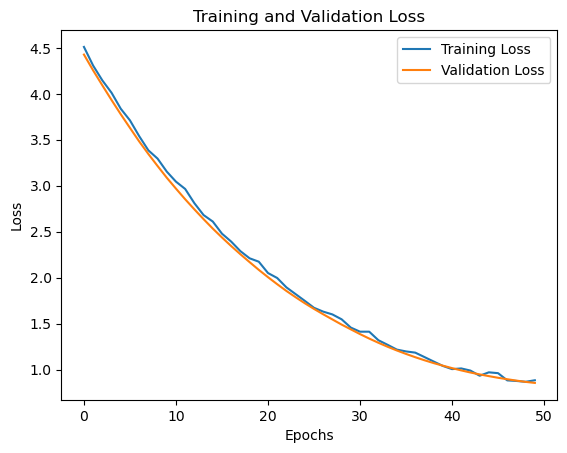

In [57]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [90]:
new_data = pd.DataFrame({"Ratio":[1.81],"Angle_of_Base\t":[197], "Angle_of_Apex":[22], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [91]:
new_data = pd.DataFrame({"Ratio":[1.2],"Angle_of_Base\t":[300], "Angle_of_Apex":[37], "Length_of_Petiole":5.3})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [92]:
new_data = pd.DataFrame({"Ratio":[1.58],"Angle_of_Base\t":[150], "Angle_of_Apex":[20], "Length_of_Petiole":3.4})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [93]:
new_data = pd.DataFrame({"Ratio":[1.77],"Angle_of_Base\t":[290], "Angle_of_Apex":[26], "Length_of_Petiole":2.6})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [94]:
new_data = pd.DataFrame({"Ratio":[1.81],"Angle_of_Base\t":[1197], "Angle_of_Apex":[22], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [95]:
new_data = pd.DataFrame({"Ratio":[1.4],"Angle_of_Base\t":[260], "Angle_of_Apex":[30], "Length_of_Petiole":5})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [96]:
new_data = pd.DataFrame({"Ratio":[1.3],"Angle_of_Base\t":[230], "Angle_of_Apex":[30], "Length_of_Petiole":1.3})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [97]:
new_data = pd.DataFrame({"Ratio":[1.33],"Angle_of_Base\t":[250], "Angle_of_Apex":[30], "Length_of_Petiole":2})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [98]:
new_data = pd.DataFrame({"Ratio":[1.43],"Angle_of_Base\t":[270], "Angle_of_Apex":[23], "Length_of_Petiole":4.2})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [99]:
new_data = pd.DataFrame({"Ratio":[1.28],"Angle_of_Base\t":[200], "Angle_of_Apex":[38], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Betel'

In [89]:
new_data = pd.DataFrame({"Ratio":[1.59],"Angle_of_Base\t":[160], "Angle_of_Apex":[60], "Length_of_Petiole":2.5})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [100]:
new_data = pd.DataFrame({"Ratio":[1.13],"Angle_of_Base\t":[141], "Angle_of_Apex":[39], "Length_of_Petiole":1.6})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [101]:
new_data = pd.DataFrame({"Ratio":[1.93],"Angle_of_Base\t":[93], "Angle_of_Apex":[61], "Length_of_Petiole":2})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [103]:
new_data = pd.DataFrame({"Ratio":[1.7],"Angle_of_Base\t":[123], "Angle_of_Apex":[30], "Length_of_Petiole":2.2})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [104]:
new_data = pd.DataFrame({"Ratio":[1.76],"Angle_of_Base\t":[135], "Angle_of_Apex":[46], "Length_of_Petiole":1.4})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [105]:
new_data = pd.DataFrame({"Ratio":[1.69],"Angle_of_Base\t":[120], "Angle_of_Apex":[57], "Length_of_Petiole":3})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [106]:
new_data = pd.DataFrame({"Ratio":[1.62],"Angle_of_Base\t":[115], "Angle_of_Apex":[52], "Length_of_Petiole":1.7})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [107]:
new_data = pd.DataFrame({"Ratio":[1.71],"Angle_of_Base\t":[112], "Angle_of_Apex":[39], "Length_of_Petiole":1.5})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [108]:
new_data = pd.DataFrame({"Ratio":[1.55],"Angle_of_Base\t":[165], "Angle_of_Apex":[50], "Length_of_Petiole":4.3})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [109]:
new_data = pd.DataFrame({"Ratio":[1.66],"Angle_of_Base\t":[158], "Angle_of_Apex":[49], "Length_of_Petiole":2})
prediction = knn.predict(new_data)
prediction[0]

'Pepper'

In [110]:
new_data = pd.DataFrame({"Ratio":[1.35],"Angle_of_Base\t":[230], "Angle_of_Apex":[55], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [111]:
new_data = pd.DataFrame({"Ratio":[1.36],"Angle_of_Base\t":[180], "Angle_of_Apex":[40], "Length_of_Petiole":8})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [112]:
new_data = pd.DataFrame({"Ratio":[1.33],"Angle_of_Base\t":[250], "Angle_of_Apex":[45], "Length_of_Petiole":2})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [113]:
new_data = pd.DataFrame({"Ratio":[1.35],"Angle_of_Base\t":[230], "Angle_of_Apex":[55], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [114]:
new_data = pd.DataFrame({"Ratio":[1.22],"Angle_of_Base\t":[210], "Angle_of_Apex":[50], "Length_of_Petiole":8})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [115]:
new_data = pd.DataFrame({"Ratio":[1.41],"Angle_of_Base\t":[220], "Angle_of_Apex":[50], "Length_of_Petiole":8})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [116]:
new_data = pd.DataFrame({"Ratio":[1.41],"Angle_of_Base\t":[240], "Angle_of_Apex":[50], "Length_of_Petiole":2})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [117]:
new_data = pd.DataFrame({"Ratio":[1.35],"Angle_of_Base\t":[180], "Angle_of_Apex":[55], "Length_of_Petiole":9})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [118]:
new_data = pd.DataFrame({"Ratio":[1.41],"Angle_of_Base\t":[190], "Angle_of_Apex":[50], "Length_of_Petiole":8})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'

In [119]:
new_data = pd.DataFrame({"Ratio":[1.6],"Angle_of_Base\t":[180], "Angle_of_Apex":[35], "Length_of_Petiole":6})
prediction = knn.predict(new_data)
prediction[0]

'Long_Pepper'